<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
!pip install calmap
import calmap
!pip3 install pandas_profiling --upgrade
from pandas_profiling import ProfileReport

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 6.1 MB/s 
     |████████████████████████████████| 4.7 MB 45.8 MB/s 
     |████████████████████████████████| 9.8 MB 39.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 67.8 MB/s 
     |████████████████████████████████| 690 kB 41.4 MB/s 
     |████████████████████████████████| 306 kB 55.2 MB/s 
     |████████████████████████████████| 296 kB 49.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=81658264c6a32dd7d1cf5f2bc52ffe02595621efd7fad8958f4feb738f545abf
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing inst

### Task 1: Initial Data Exploration

In [3]:
df=pd.read_csv("/content/sample_data/supermarket_sales - Sheet1.csv")

In [4]:
df.head(10)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   
5  699-14-3026      C  Naypyitaw        Normal    Male   
6  355-53-5943      A     Yangon        Member  Female   
7  315-22-5665      C  Naypyitaw        Normal  Female   
8  665-32-9167      A     Yangon        Member  Female   
9  692-92-5582      B   Mandalay        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
5  Electronic accessories       85.39         7  29.8865  627.6165  3/25/2019   
6  Electronic accessories       68.84         6  20.6520  433.6920  2/25/2019   
7      Home and lifestyle       73.56        10  36.7800  772.3800  2/24/2019   
8       Health and beauty       36.26         2   3.6260   76.1460  1/10/2019   
9      Food and beverages       54.84         3   8.2260  172.7460  2/20/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3  
5  18:30      Ewallet  597.73                 4.761905       29.8865     4.1  
6  14:36      Ewallet  413.04                 4.761905       20.6520     5.8  
7  11:38      Ewallet  735.60                 4.761905       36.7800     8.0  
8  17:15  Credit card   72.52                 4.761905        3.6260     7.2  
9  13:27  Credit card  164.52                 4.761905        8.2260     5.9

In [5]:
df.dtypes


Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df.set_index('Date',inplace= True) # inplace = true to signify permanent change to the data frame.

In [9]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


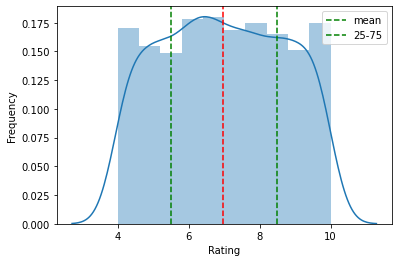

In [10]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--') # axvline for plotting vertical line 
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='mean') # for plotting percentile 
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--',label='25-75')
plt.ylabel("Frequency")
plt.legend()
plt.show()

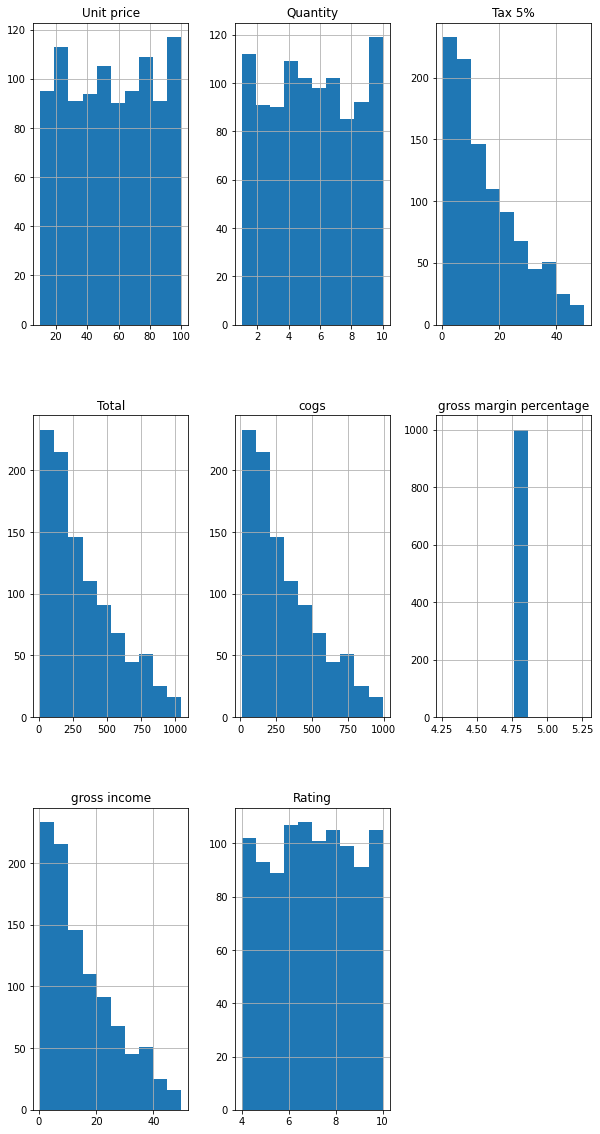

In [11]:
df.hist(figsize=(10,20))
plt.show()

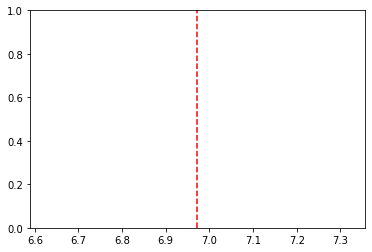

In [12]:
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--')
plt.show()

**Conclusion**

The frequency of ratings plot is not skewed in any direction 


**Question 2:** Do aggregate sales numbers differ by much between branches?

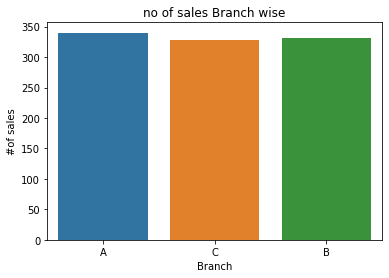

A    340
B    332
C    328
Name: Branch, dtype: int64

In [13]:
sns.countplot(x=df['Branch'])
plt.title('no of sales Branch wise')
plt.ylabel('#of sales')
plt.show()
df['Branch'].value_counts()

***Now, we are done with univariate analysis. So, lets go on analyzing two variables at a time. i.e finding correlations. The best visualizations for interpreting correlations are scatter plot and heatmap ***


### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

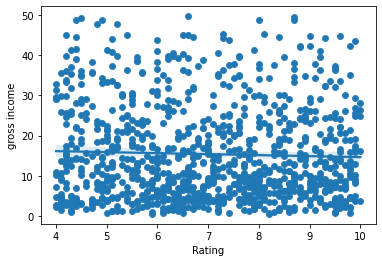

In [14]:
sns.scatterplot(x=df['Rating'],y=df['gross income'])
sns.regplot(x=df['Rating'],y=df['gross income']) ## for trendline

BOX PLOT IS USED TO PLOT CATEGORICAL VARIABLE WITH NUMERICAL VARIABLE.

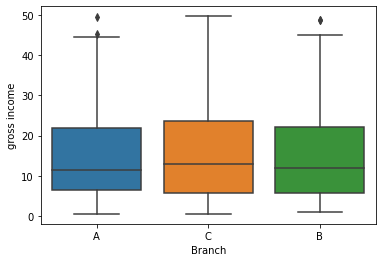

In [15]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

AS VISIBLE FROM THE ABOVE PLOT, INTERESTINGLY, THERE IS NO CORRELATION BETWEEN THE GROSS INCOME AND CUSTOMER RATINGS.

**Question 4:** Is there a noticeable time trend in gross income?

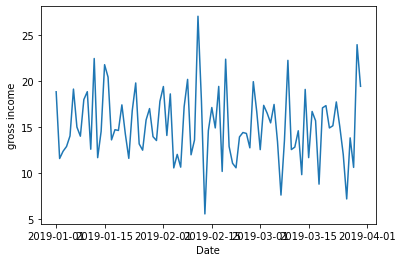

In [16]:
sns.lineplot(x=df.groupby(df.index).mean().index,y=df.groupby(df.index).mean()['gross income'])

### Task 4: Dealing With Duplicate Rows and Missing Values

In [17]:
df.duplicated().sum()  ### duplicated is a boolean operator and attaching sum to it returns total no of duplicated values
df[df.duplicated()==True] # returns the entries in data frame where the entries are duplicated 
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


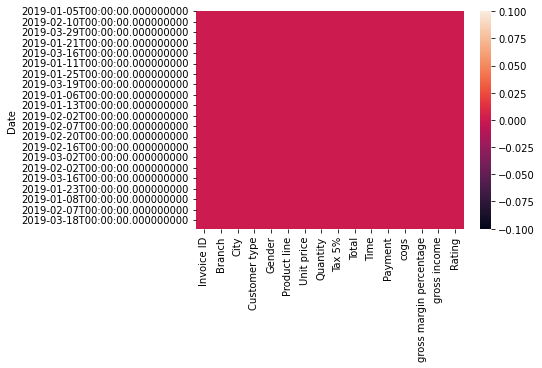

In [18]:
df.isna().sum() # counts the no of missing values in each field, here na represents notavailable
len(df) 
sns.heatmap(df.isnull(), cbar= True)
df.fillna(df.mean(),inplace= True) # for replacing the numerical values only 

FOR CATEGORICAL VALUES, MODE CAN BE USED TO REPLACE THE MISSING VALUES 

In [19]:
df.mode()
df.fillna(df.mode().iloc[0], inplace= True)
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69         7  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28         5   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33         7  16.2155  340.5255   
2019-01-27       Health and beauty       58.22         8  23.2880  489.0480   
2019-02-08       Sports and travel       86.31         7  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

**Pandas profiling streamlines the entire EDA process** 

In [20]:

dataset= pd.read_csv("/content/sample_data/supermarket_sales - Sheet1.csv")
df1 = ProfileReport(dataset)
df1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Task 5: Correlation Analysis

In [21]:
np.corrcoef(df['gross income'],df['Rating'])


array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

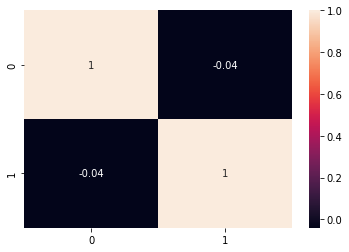

In [22]:
sns.heatmap(np.round(np.corrcoef(df['gross income'],df['Rating']),2), annot= True)